In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Support Vector Machines (SVM)


Support Vector Machines (SVM) consiste em um conjunto de métodos de aprendizado supervisionado que podem ser usados para classificação, regressão e detecção de outliers. O objetivo do SVM é encontrar o hiperplano que melhor separa duas classes de dados. O hiperplano é escolhido de modo que a distância entre ele e os pontos de dados de cada classe seja maximizada.

## Linear SVM

O SVM linear é um caso especial de SVM, onde o hiperplano de separação é um hiperplano linear. O SVM linear pode ser usado para classificação binária ou para classificação multiclasse.

In [18]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])
svm_clf.fit(X, y)



Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [29]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

A resposta array([1.]) obtida a partir da predição do classificador SVM (Máquina de Vetores de Suporte) significa que a instância com comprimento de pétala 5.5 e largura de pétala 1.7 foi classificada como pertencente à classe representada por 1. No contexto do código, esta classe é 'Iris-Virginica'.

## Nonlinear SVM (SVM não linear)

É uma extensão do SVM linear que é usada para lidar com dados que não são linearmente separáveis. Em outras palavras, é uma técnica que permite ao SVM classificar dados que não podem ser divididos por uma linha reta (ou um hiperplano, em dimensões mais altas). 

In [44]:
import matplotlib.pyplot as plt

def plot_predictions(clf, axes):
    # Constroi uma lista de valores das variáveis independentes
    # que cubra o espaço amostral.
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    # Constroi as predições (binárias) e a função de decisão (contínua).
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # Desenha a curva de decisão e as curvas de nível da função de decisão.
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

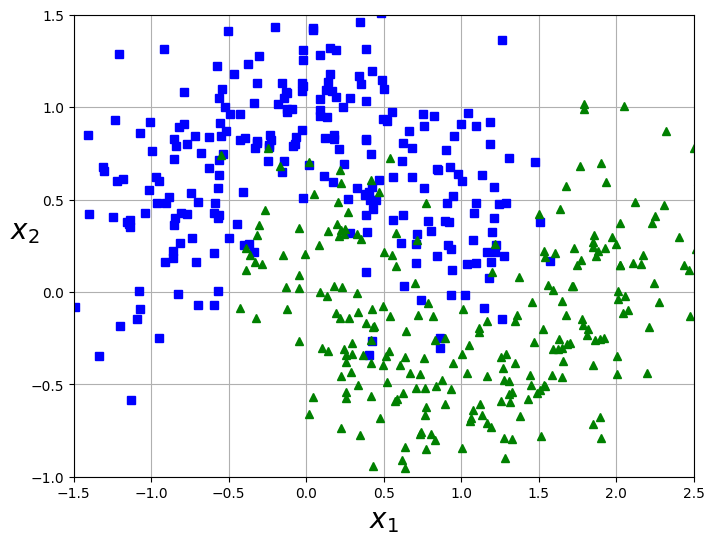

In [45]:
from sklearn.datasets import make_moons

RANDOM_SEED = 42

X, y = make_moons(n_samples=500, noise=0.3, random_state=RANDOM_SEED)

plt.figure(figsize=(8, 6))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

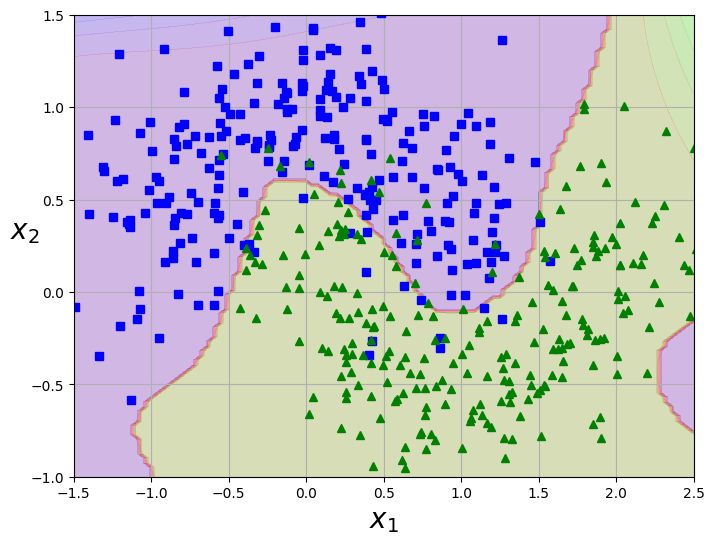

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC

# Equivale a:
#
# poly_features = PolynomialFeatures(degree=7)
# scaler = StandardScaler()
# svm_clf = LinearSVC(C=1e-5, dual=False, random_state=RANDOM_SEED)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=7)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1e5, dual=False, random_state=RANDOM_SEED)),
])

# Equivale a:
#
# X1 = poly_features.fit_transform(X)  # Não faz nada.
# X2 = scaler.fit_transform(X1)  # Ajusta media e desvio padrao.
# X3 = svm_clf.fit(X2, y)

polynomial_svm_clf.fit(X, y)

# O polynomial_svm_clf.predict(X) equivale a:
#
# X1 = poly_features.transform(X)  # Não faz nada.
# X2 = scaler.transform(X1)  # Ajusta media e desvio padrao.
# X3 = svm_clf.predict(X2)

plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [43]:
polynomial_svm_clf.predict([[6, 0.5]])

# 0 se for iris-virginica e 1 se não for

array([0.])

O parâmetro C representa o parâmetro de regularização (penalidade por erro), ou seja, quanto maior o valor de C, menor a regularização (maior a penalidade por erro)

Menos Tolerância a Erros de Classificação:

1. Com um valor alto de 
C, o modelo SVM dá maior ênfase à classificação correta de cada instância de treinamento. Isso significa que o modelo será menos tolerante a erros de classificação nos dados de treinamento.
Margem Menor e Mais Complexidade:

2. Um valor elevado de 
C pode resultar em um modelo com uma margem menor, pois o modelo faz um esforço extra para classificar corretamente as instâncias mais difíceis de treinamento. Isso pode levar a um modelo mais complexo ou mais específico para o conjunto de dados de treinamento.
Risco de Sobreajuste (Overfitting):

3. Quando 
C é muito alto, o modelo pode se ajustar demais aos dados de treinamento (sobreajuste), capturando ruídos e padrões específicos que não se generalizam bem para dados não vistos.
Equilíbrio entre Rigidez e Generalização:

4. A escolha do valor de 
C deve buscar um equilíbrio entre a rigidez do modelo (minimizando os erros de treinamento) e a capacidade de generalização para dados não vistos. Valores muito baixos podem levar a uma generalização excessiva (underfitting), enquanto valores muito altos podem causar sobreajuste.


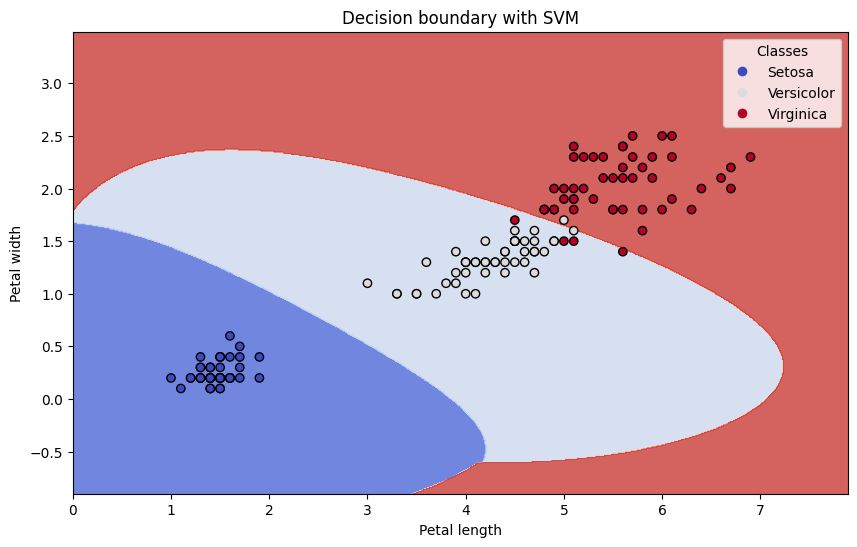

In [48]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Carregando o conjunto de dados Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Criando o pipeline com um SVM não linear usando o kernel RBF
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma='scale', C=0.5))
])

# Treinando o modelo
svm_clf.fit(X, y)

# Função para plotar a fronteira de decisão
# Adicionando uma legenda ao gráfico para melhorar a interpretação

def plot_decision_boundary_with_legend(clf, X, y, plot_title="Decision boundary with SVM"):
    x0, x1 = X[:, 0], X[:, 1]
    x0_min, x0_max = x0.min() - 1, x0.max() + 1
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    xx, yy = np.meshgrid(np.arange(x0_min, x0_max, 0.01),
                         np.arange(x1_min, x1_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(x0, x1, c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(plot_title)

    # Criando a legenda
    plt.legend(handles=scatter.legend_elements()[0], 
               title="Classes", 
               labels=["Setosa", "Versicolor", "Virginica"])
    
    plt.show()

# Plotando a fronteira de decisão com a legenda
plot_decision_boundary_with_legend(svm_clf, X, y)
